In [0]:

from google.colab import files
uploaded = files.upload()

Saving covid_19_clean_complete.csv to covid_19_clean_complete.csv


In [0]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.simplefilter('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv("covid_19_clean_complete.csv", delimiter=",")
df.groupby(['Country/Region']).sum()
a = df['Country/Region']
print(a)
df.groupby(['Confirmed']).sum()
b = df['Confirmed']
print(b)
# date = [elem for elem in df['Date']]
# values = [elem for elem in df['Confirmed']]
# plt.xticks(range(0,len(date)),rotation=45)
# plt.plot(country, values)
df = pd.read_csv("covid_19_clean_complete.csv")
df.tail(5)

0                  Afghanistan
1                      Albania
2                      Algeria
3                      Andorra
4                       Angola
                 ...          
32060    Sao Tome and Principe
32061                    Yemen
32062                  Comoros
32063               Tajikistan
32064                  Lesotho
Name: Country/Region, Length: 32065, dtype: object
0           0
1           0
2           0
3           0
4           0
         ... 
32060     251
32061     197
32062      34
32063    2350
32064       1
Name: Confirmed, Length: 32065, dtype: int64


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
32060,NaN,Sao Tome and Principe,0.186360,6.613081,5/21/20,251,8,4
32061,NaN,Yemen,15.552727,48.516388,5/21/20,197,33,0
32062,NaN,Comoros,-11.645500,43.333300,5/21/20,34,1,8
32063,NaN,Tajikistan,38.861034,71.276093,5/21/20,2350,44,0
32064,NaN,Lesotho,-29.609988,28.233608,5/21/20,1,0,0


In [0]:
def pltCountry_cases(country_name):
    f,ax=plt.subplots(figsize=(16,5))
    labels=country_name
    xcoords = [50]
    colors = ['g']
   
    for a in labels: 
        #print(a)
        country=df.loc[(df['Country/Region']==a)]
        plt.plot(country['Date'],country['Confirmed'],linewidth=4)
        #fig = px.bar(df, y='pop', x='country', text='pop')
        plt.xticks(rotation=90)
        plt.ylabel('Confirmed Cases')
        plt.xlabel('Date')
        plt.legend(labels)
        ax.set(title='Evolution of the number of Confirmed cases' )
        #plt.text(2,-50,'This text starts at point (2,4)')
        
    for xc,c in zip(xcoords,colors):
        plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c)
       

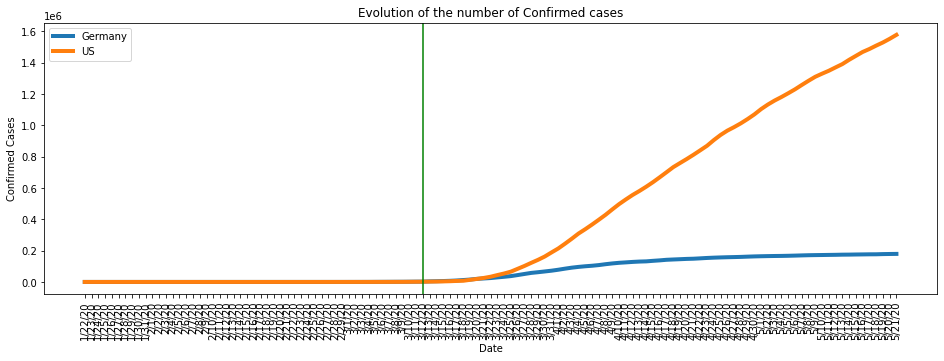

In [0]:
pltCountry_cases(['Germany', 'US'])


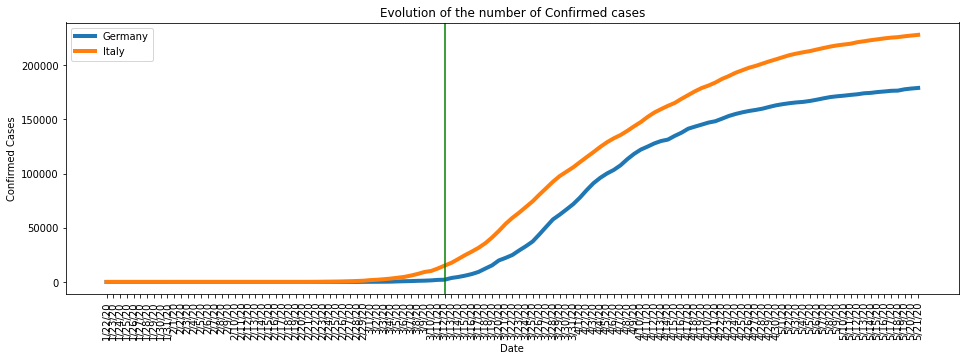

In [0]:
pltCountry_cases(['Germany', 'Italy'])

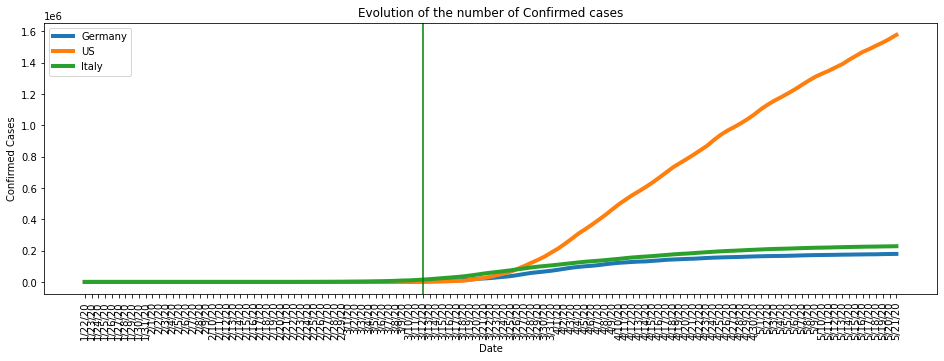

In [0]:
pltCountry_cases(['Germany', 'US','Italy'])

In [0]:
def pltCountry_cases(country_name):
    f,ax=plt.subplots(figsize=(16,5))
    labels=country_name
    for a in labels: 
        #print(a)
        country=df.loc[(df['Country/Region']==a)]
        plt.plot(country['Date'],country['Recovered'],linewidth=4)
        #fig = px.bar(df, y='pop', x='country', text='pop')
        plt.xticks(rotation=90)
        plt.ylabel('Recovered Cases')
        plt.xlabel('Date')
        plt.legend(labels)
        ax.set(title='Evolution of the number of Recovered cases' )

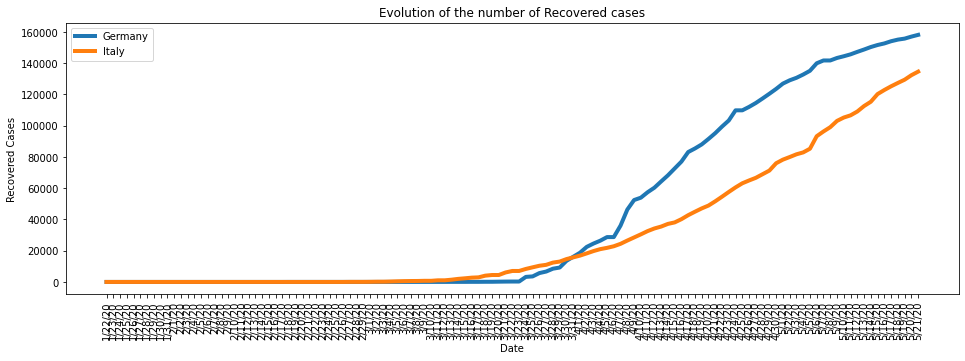

In [0]:
pltCountry_cases(['Germany', 'Italy'])

In [0]:
def pltCountry_cases(country_name):
    f,ax=plt.subplots(figsize=(16,5))
    labels=country_name
    for a in labels: 
        #print(a)
        country=df.loc[(df['Country/Region']==a)]
        plt.plot(country['Date'],country['Deaths'],linewidth=4)
        #fig = px.bar(df, y='pop', x='country', text='pop')
        plt.xticks(rotation=90)
        plt.ylabel('Deaths Cases')
        plt.xlabel('Date')
        plt.legend(labels)
        ax.set(title='Evolution of the number of Deaths cases' )

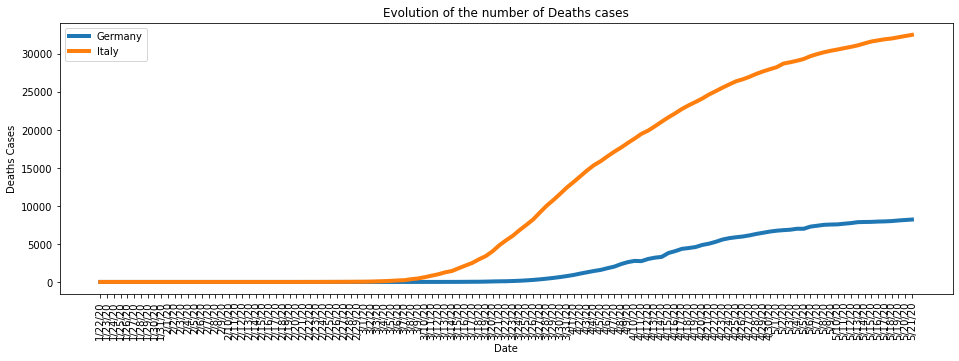

In [0]:
pltCountry_cases(['Germany', 'Italy'])

In [0]:
case='Confirmed'
def timeCompare(time,*argv):
    Coun1=argv[0]
    Coun2=argv[1]
    f,ax=plt.subplots(figsize=(16,5))
    labels=argv  
    country=df.loc[(df['Country/Region']==Coun1)]
    plt.plot(country['Date'],country[case],linewidth=2)
    plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of actual cases',ylabel='Number of cases' )

    country2=df.loc[df['Country/Region']==Coun2]
    #country2['Date']=country2['Date']-datetime.timedelta(days=time)
    plt.plot(country2['Date'],country2[case],linewidth=2)
    #plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of cases in %d days difference '%time ,ylabel='Number of %s cases'%case )

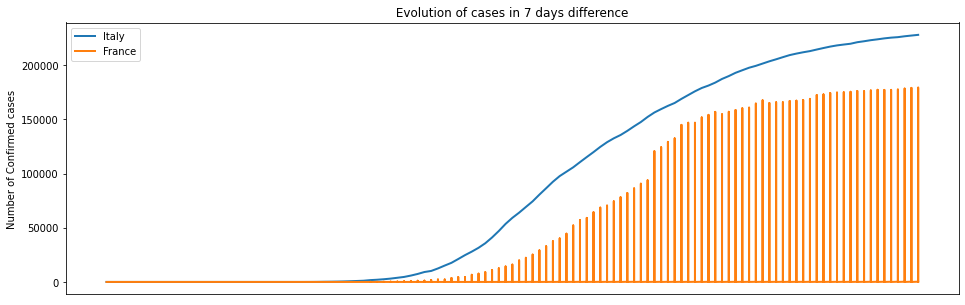

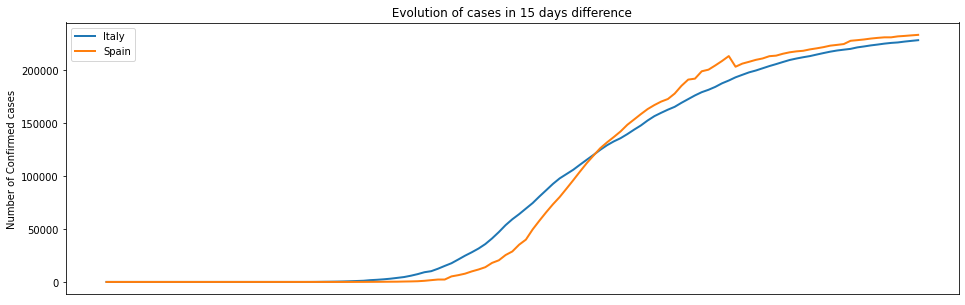

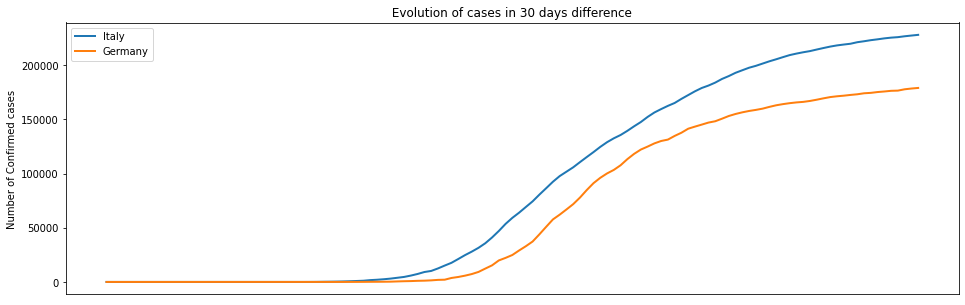

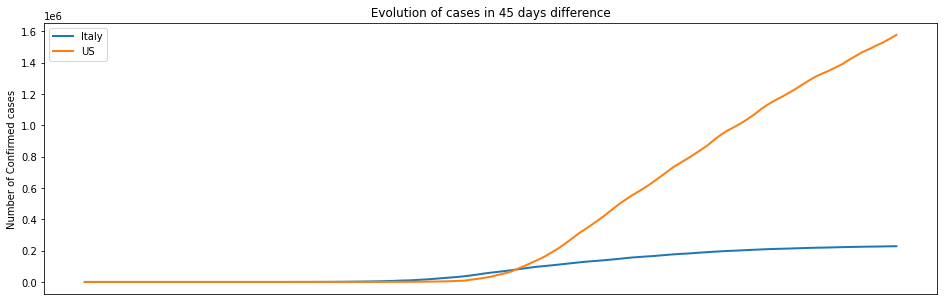

In [0]:
timeCompare(7,'Italy','France')
timeCompare(15,'Italy','Spain')
timeCompare(30,'Italy','Germany')
timeCompare(45,'Italy','US')

In [0]:
sns.set(palette = 'Set1',style='darkgrid')
#Function for making a time serie on a designated country and plotting the rolled mean and standard 
def roll(country,case='Confirmed'):
    ts=df.loc[(df['Country/Region']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['Confirmed']>=10)])
    ts=ts[-a:]
    return (ts.rolling(window=4,center=False).mean().dropna())


def rollPlot(country, case='Confirmed'):
    ts=df.loc[(df['Country/Region']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['Confirmed']>=10)])
    ts=ts[-a:]
    plt.figure(figsize=(16,6))
    plt.plot(ts.rolling(window=7,center=False).mean().dropna(),label='Rolling Mean')
    plt.plot(ts[case], label='ConfirmedCases')
    plt.plot(ts.rolling(window=7,center=False).std(),label='Rolling std')
    #plt.plot('Confirmed', label='First Line')
    plt.legend()
    plt.title('Cases distribution in %s with rolling mean and standard' %country)
    plt.xticks([])

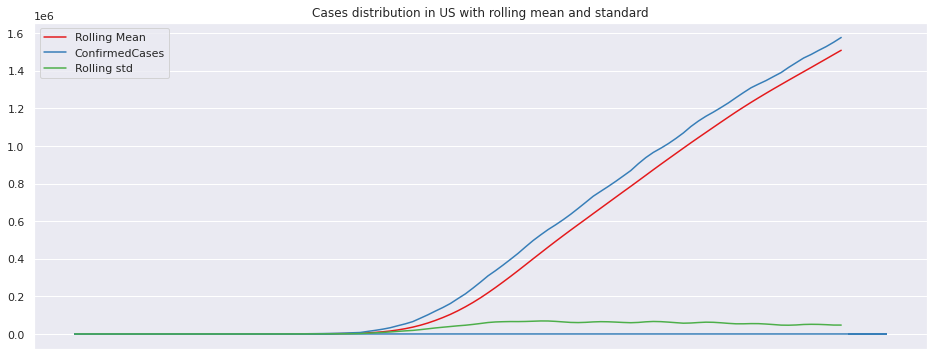

In [0]:
tsC1=roll('US')
rollPlot('US')

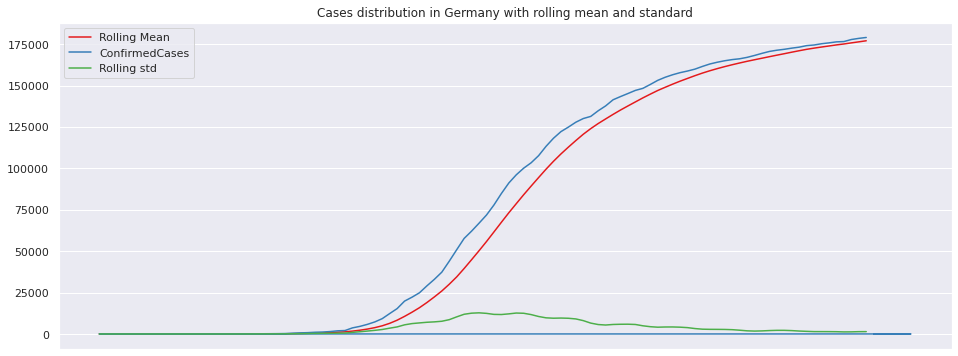

In [0]:
tsC6=roll('Germany')
rollPlot('Germany')

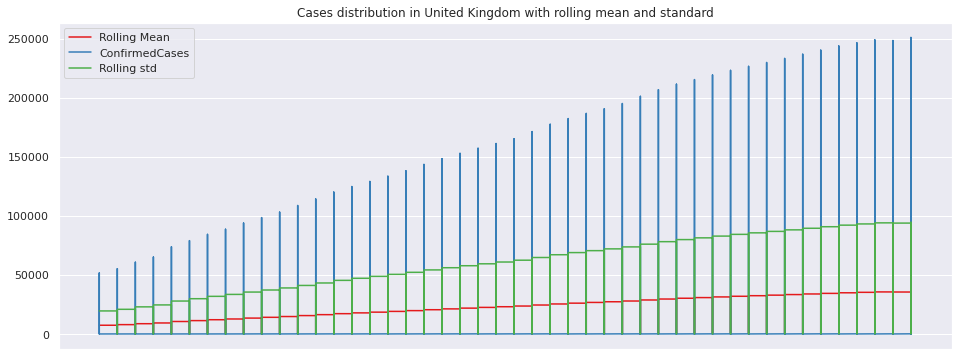

In [0]:
tsC8=roll('United Kingdom')
rollPlot('United Kingdom')

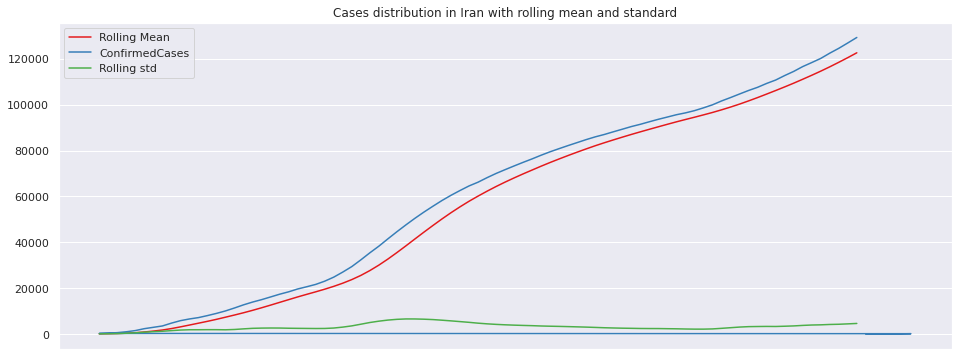

In [0]:
tsC1=roll('Iran')
rollPlot('Iran')

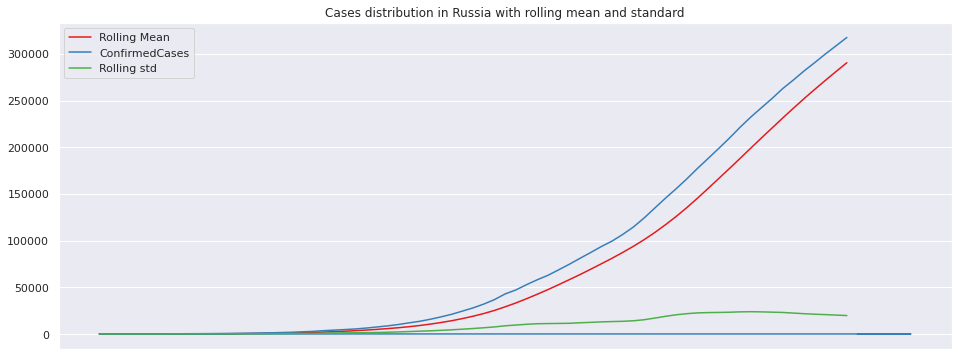

In [0]:
tsC1=roll('Russia')
rollPlot('Russia')

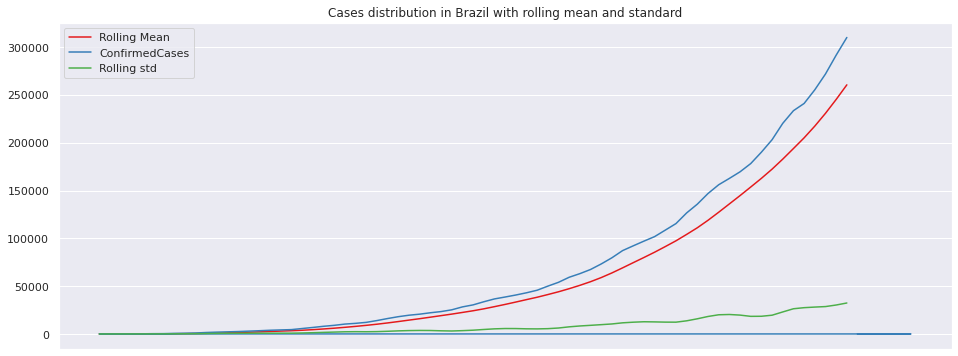

In [0]:
tsC1=roll('Brazil')
rollPlot('Brazil')

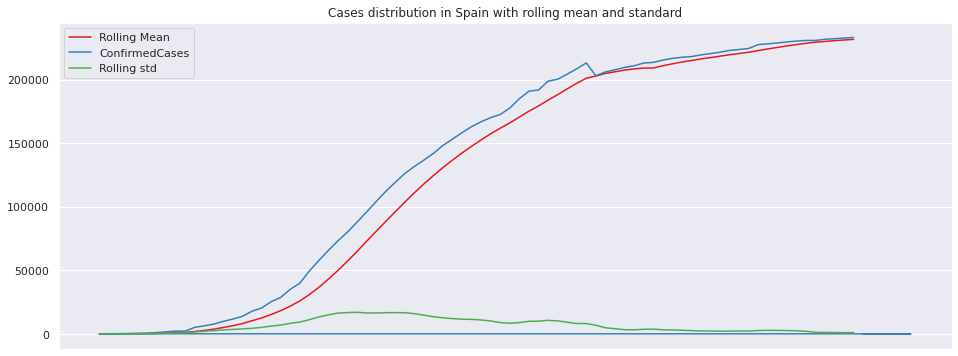

In [0]:
tsC1=roll('Spain')
rollPlot('Spain')

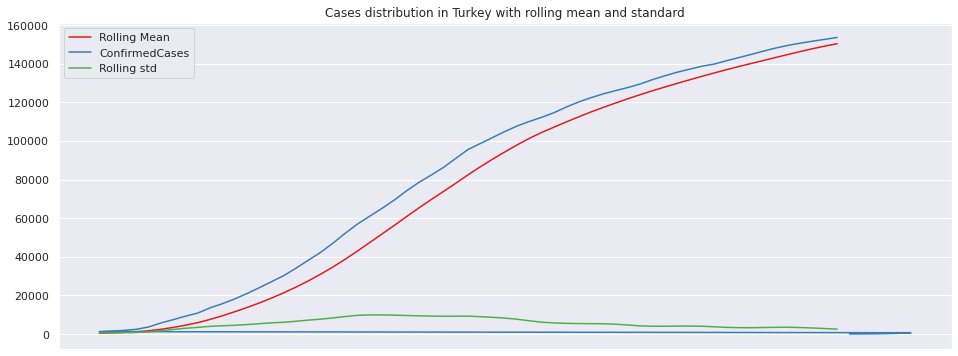

In [0]:
tsC1=roll('Turkey')
rollPlot('Turkey')

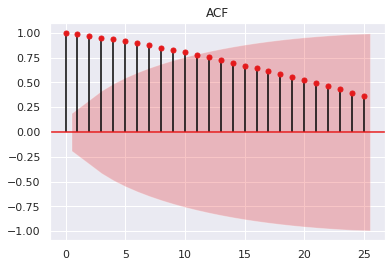

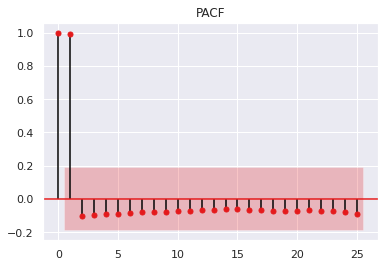

In [0]:
def corr(ts):
    plot_acf(ts,lags=25,title="ACF")
    plot_pacf(ts,lags=25,title="PACF")
    

#For Germany
corr(tsC6)